# SC1015: Introduction to Data Science and Artificial Intelligence

### Tutorial Group: FCSB
### Group 3: 
Tng Jun Wen

Chen Yichen

Keagan Kong Kai Yi

## 1) Introduction

### 1.1) Topic
Entertainment has always been a large part of humanity and cultures all over the world. Even before industrialisation, indigenous people in villages were had folk songs to sing and intricate stories to tell. Over the past century, entertainment has evolved leaps and bounds, from theatre acts and plays to films and even more recently, short form videos on platforms like TikTok. However, one aspect of entertainment that has not changed is the presence of fun and enjoyment. Over the last half century, this fun and enjoyment has evolved to people of all ages playing video games, first as retro 8-bit games in arcades, then as games on our modern computers and console platforms in each household, such as the older Nintendo 64 or more modern consoles like the Sony PS5. As SCSE students, many of us have vast interests in video games and these games were large parts of our childhood, or played frequently in our current daily lives, or even both. As such, we have decided to look into the sales of video games over the years.

### 1.1) Dataset Chosen
The dataset we have chosen to use for this Mini-Project is "Video Game Sales" by Gregory Smith, username gregorut, on Kaggle. This dataset contains a list of all video game sales with greater than 100,000 copies sold between the years 1980 and 2020. The fields, or columns that are included in this dataset are RANK of overall sales, NAME of the game, PLATFORM of the game's release, YEAR of the game's release, GENRE of the game, PUBLISHER of the game, sales in North America, Europe, Japan, other parts of the world (in millions), and total worldwide sales (millions). A link to the dataset can be found below.

https://www.kaggle.com/datasets/gregorut/videogamesales/data

### 1.2) Problem Formulaton
For this Mini-project, we will use data and variables provided for us in the dataset, such as Genre, Publisher and Platform, to predict the correlation and pattern in Global Sales for the game.

## 2) Preparation and cleaning of data

In this section of the project, we will prepare and clean the dataset to help us analyse our data better and also to help us use our data for the purposes of machine learning in the later sections. 

### 2.1) Importing the required Libraries

First, we import all the required libraries that we will be using

In [1]:
import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### 2.2) Importing the data
Next, we import the dataset. Since the dataset is a .csv file, we use the `read_csv` function from Pandas. Afterwards, we display the data to ensure that the data generally imported properly.

In [2]:
data=pd.read_csv("vgsales.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


We take another quick look at the data using the `head` and `tail` functions on the dataset to ensure that there are no issues with the data from the start to the end.

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


### 2.3) Cleaning our data
Our next step is to clean up any usuable data in our code. First we use the `isnull` function to check if there are any data entries that are missing any information, and the `sum` function to see how many Null values are in each column. 

In [5]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Now we use the `dropna` function to remove Null data entries to "clean" the data to ensure that all the data can be compared to each other.

In [6]:
data=data.dropna()
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Verify that the data has been successfully "cleaned" and that there are no more rows with Null data using the `isnull` and `sum` functions again.

In [7]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Verify that there are no duplicate rows using the `duplicated` and `describe` functions.

In [8]:
data.duplicated().describe()

count     16291
unique        1
top       False
freq      16291
dtype: object

Now, we use the `info` function on the data to confirm that the number of non-Null data entries are the same for each column, as well as check the dtype for each column.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Since 'Year' should not be a 'Float" data type, we can change the dtype of 'Year' to be in the datetime format using the `to_datetime` function, then we check that it was successful using the `info` function again.

In [10]:
data['Year']=pd.to_datetime(data['Year'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16291 non-null  int64         
 1   Name          16291 non-null  object        
 2   Platform      16291 non-null  object        
 3   Year          16291 non-null  datetime64[ns]
 4   Genre         16291 non-null  object        
 5   Publisher     16291 non-null  object        
 6   NA_Sales      16291 non-null  float64       
 7   EU_Sales      16291 non-null  float64       
 8   JP_Sales      16291 non-null  float64       
 9   Other_Sales   16291 non-null  float64       
 10  Global_Sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


C:\Users\keagan\AppData\Local\Temp\ipykernel_22072\651324167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year']=pd.to_datetime(data['Year'])


Now that data is cleaned, we can move on to EDA. 

## 3) Exploratory Data Analysis

Now, we will explore our DataFrame further using Exploratory Data Analysis.

### 3.1) Basic Exploration
Before we proceed to visualise our data, we first look at the statistics of our data. We use `columns` to take a look at a list all the columns.

In [11]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

We use the `describe` function to describe the dataset to get a general sensing of the data in each column.

In [12]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,1970-01-01 00:00:00.000002006,0.265647,0.147731,0.078833,0.048426,0.540910
min,1.000000,1970-01-01 00:00:00.000001980,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,1970-01-01 00:00:00.000002003,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,1970-01-01 00:00:00.000002007,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,1970-01-01 00:00:00.000002010,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,1970-01-01 00:00:00.000002020,41.490000,29.020000,10.220000,10.570000,82.740000
std,4792.654450,NaN,0.822432,0.509303,0.311879,0.190083,1.567345


Now we plot a heatmap to see the correlation values between each of the variables and see how all the variables correlate to one another.

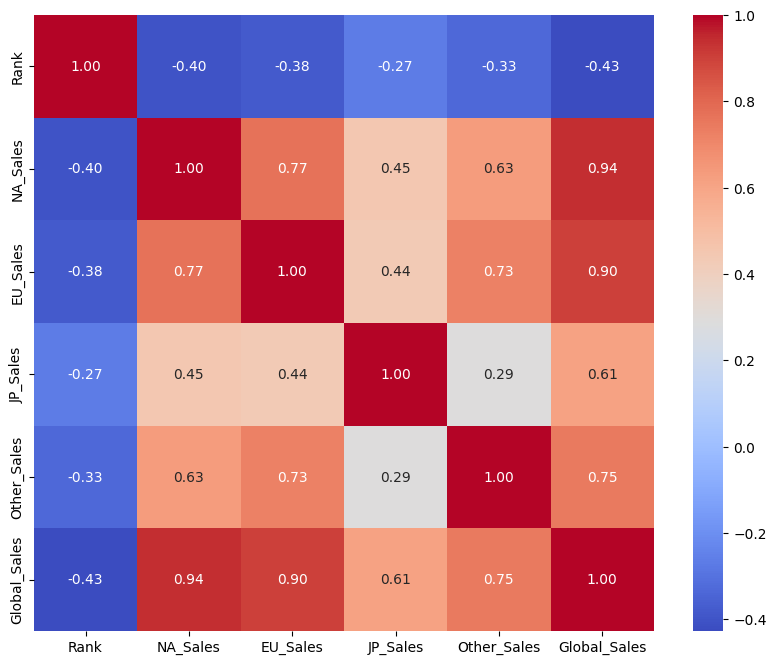

In [13]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=True, yticklabels=True)
plt.show()

We can see that Global Sales has a high correlation with both NA and EU sales, much higher than JP and Other regions. This perhaps suggests that those two regions make up a majority of the sample count, or that their preferences are generally the most aligned with the Global audience. We will continue to zoom into the specifics of how each variable affects the Global Sales in the follow sections.

### 3.2) Sales by Region
Before we look at the number of sales, we can first categorise the number of games published by year in the dataset. Since the dataset only includes entries that had more than 100,000 sales, this graph below, too, only includes games published that sold more than 100,000 copies.

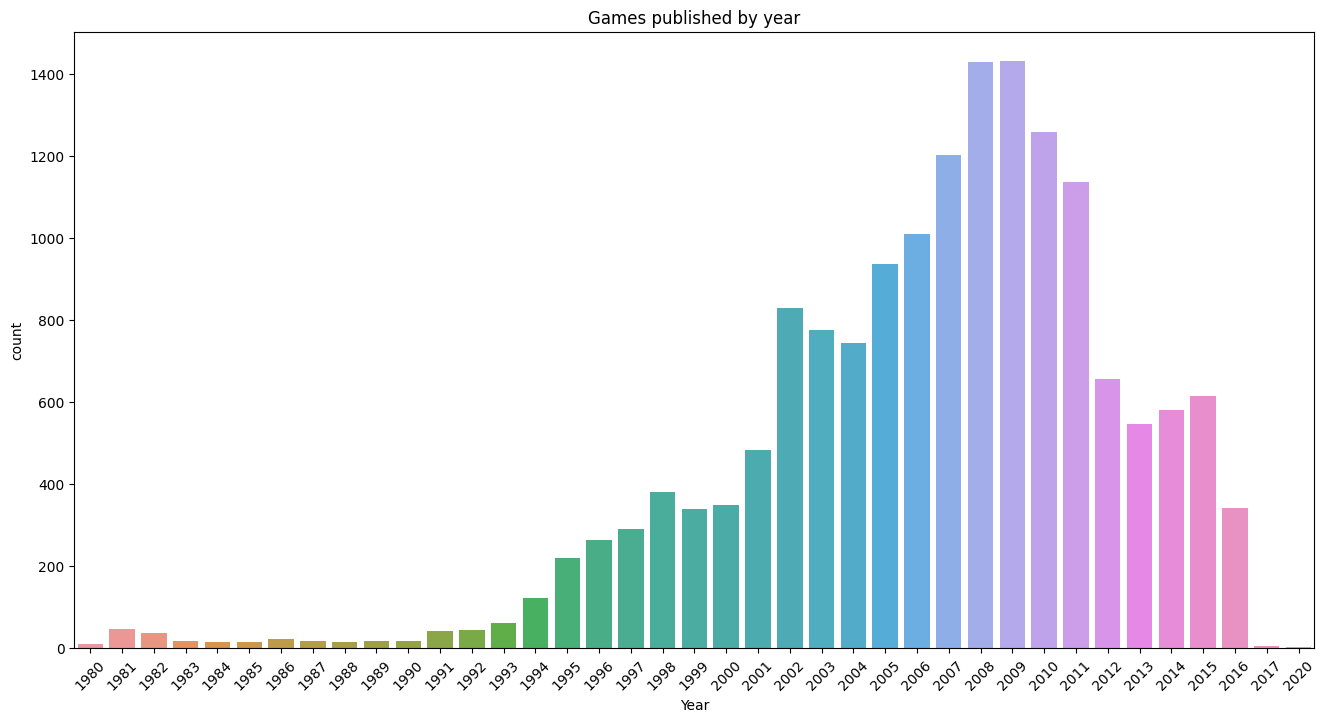

In [58]:
plt.figure(figsize=(16,8))
plt.title('Games published by year')
ax = sns.countplot(data=data,x='Year',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

We can clearly see that there seems to be a generally increasing trend in the data, most notably after the year 1990. Perhaps these skyrocketing sales after the year 1990 could be attrributed to the increasing trend of computers being common in households. 10 years later, after the year 2000, the count of video games that sell more than 100,000 copies once again rises explosively. These could perhaps be attributed to the release of the PlayStation 2 in 2001 and the XBOX in 2000.

Now, let's look at the video game sales per region by year.

C:\Users\keagan\AppData\Local\Temp\ipykernel_22072\2630354817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = pd.to_numeric(data['Year'], errors='coerce')


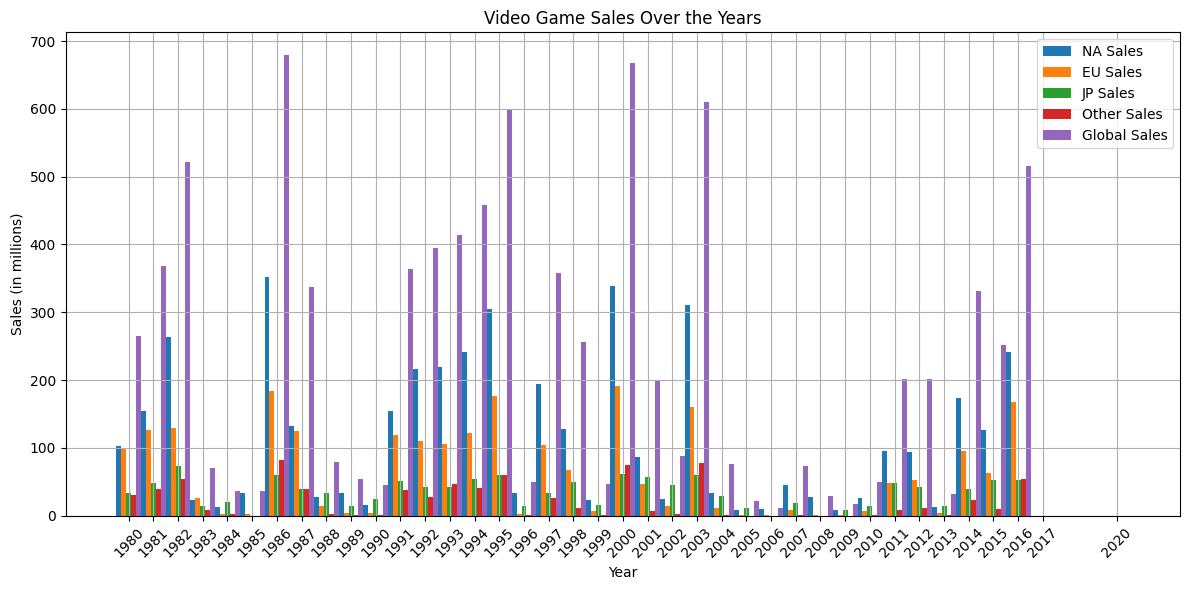

In [15]:

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

plt.figure(figsize=(12, 6))

bar_width = 0.2
index = data['Year'].unique()
bar_positions = [index - 2 * bar_width, index - bar_width, index, index + bar_width, index + 2 * bar_width]

plt.bar(bar_positions[0], data.groupby('Year')['NA_Sales'].sum(), bar_width, label='NA Sales')
plt.bar(bar_positions[1], data.groupby('Year')['EU_Sales'].sum(), bar_width, label='EU Sales')
plt.bar(bar_positions[2], data.groupby('Year')['JP_Sales'].sum(), bar_width, label='JP Sales')
plt.bar(bar_positions[3], data.groupby('Year')['Other_Sales'].sum(), bar_width, label='Other Sales')
plt.bar(bar_positions[4], data.groupby('Year')['Global_Sales'].sum(), bar_width, label='Global Sales')

plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.title('Video Game Sales Over the Years')
plt.xticks(index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The graph shows that NA produced more video game sales than EU, JP and other region sales in every single year (even though it was close in 1980). 

We can also see that the 3 years with the most sales are 1986, 2000 and 2003. Zooming in on those years in the dataset, these years saw the release of the original Legend of Zelda in 1986, Pokemon Crystal and Final Fantasy IX in 2000, and Need for Speed Underground and Mario Kart: Double Dash!! in 2003.

From the graph we can also see the periods with low video games sales, such as between 1983-1985 and 2004-2010, which both denoted periods of global recession.

Now we plot the data in a pie chart that consolidates all the years and shows us the overall proportions by sales overall throughout the years.

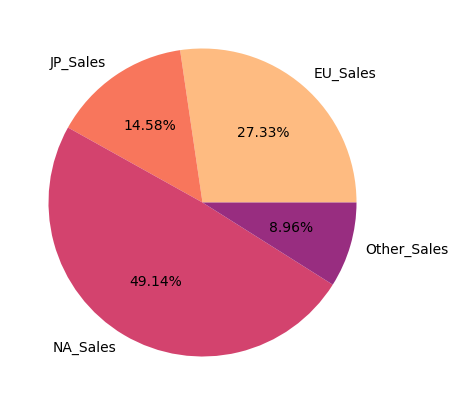

In [16]:
area_sales = data[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
area_sales = area_sales.melt(var_name='Area',value_name='Total_Sales')
area_sales = area_sales.groupby('Area')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.pie(area_sales['Total_Sales'],labels=area_sales['Area'],colors=sns.color_palette('magma_r'),autopct='%.2f%%')
plt.show()

From the pie chart, it is clear to see that NA sales make up a huge proportion of sales, accounting to almost half of all sales. This could be why NA Sales were shown to have an extremely high correlation with Global Sales earlier.

EU has a population of 448 million people, Japan with 125 million and NA with 579 million. Even though NA's population is about 30% more than EU's population, the proportion of sales in NA are almost double that of EU. EU's population is more than triple that of Japan's, but Japan's sales still add up to more than half that of EU's.

Overall, these numbers suggest that taking into account their respective population sizes, video games are the most popular in NA, followed by Japan, then EU and lastly the rest of the world.

### 3.3) Sales per Genre

Now we zoom in on the 'Genre' column

We use the `unique` function on the 'Genre' column to take a look at the list of unique genres.

In [17]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Using the `value_counts` function on the 'Genre' column allows us to see the value counts for each genre.

In [18]:
data['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

Next, we plot a bar graph to visualise how the number of video games in each genre stack up against each other in total. First, we look at the number of games published by genres.

<Axes: title={'center': 'Games published by genre'}, xlabel='Genre', ylabel='count'>

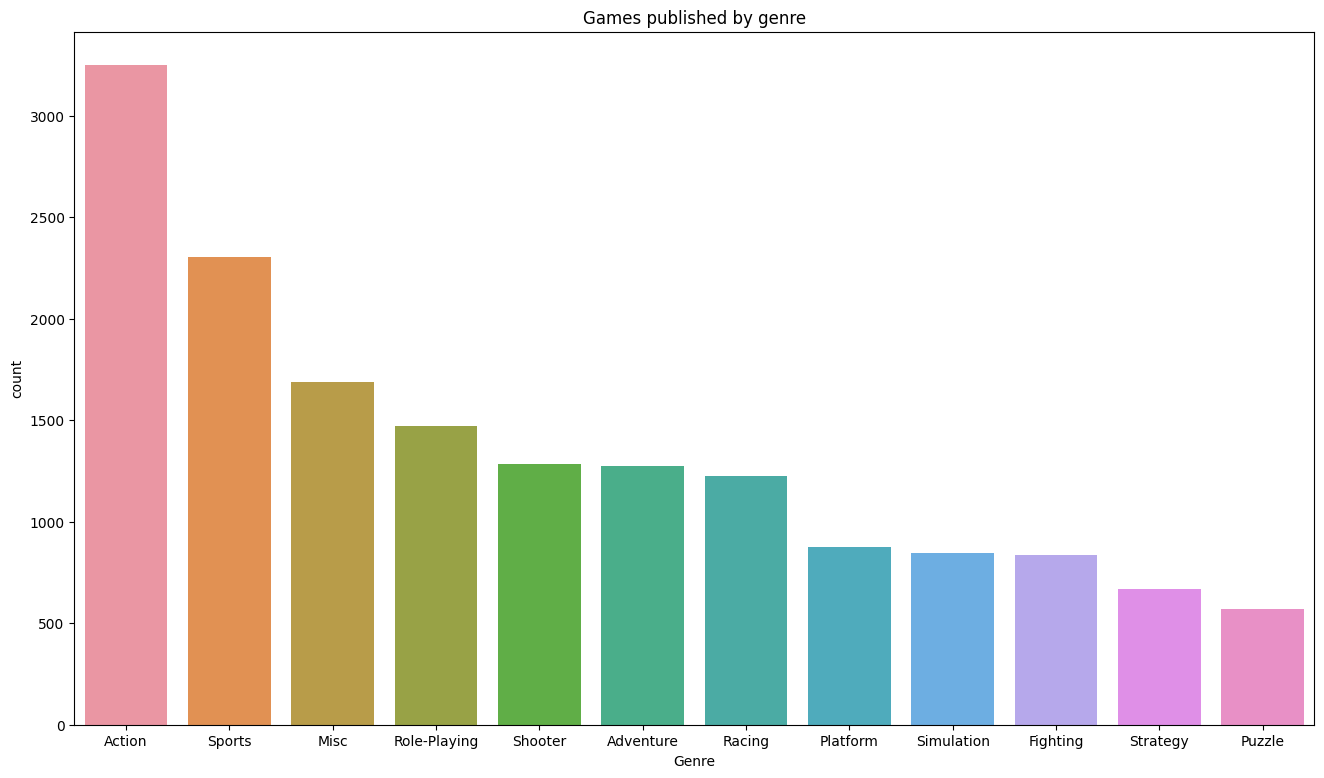

In [19]:
plt.figure(figsize=(16,9))
plt.title('Games published by genre')
sns.countplot(data=data, x = 'Genre', order = data['Genre'].value_counts().index)

In this graph, we can see that Action and Sports games largely overshadowed the other genres. Much like before, this data only includes games with sales exceeding 100,000 copies.

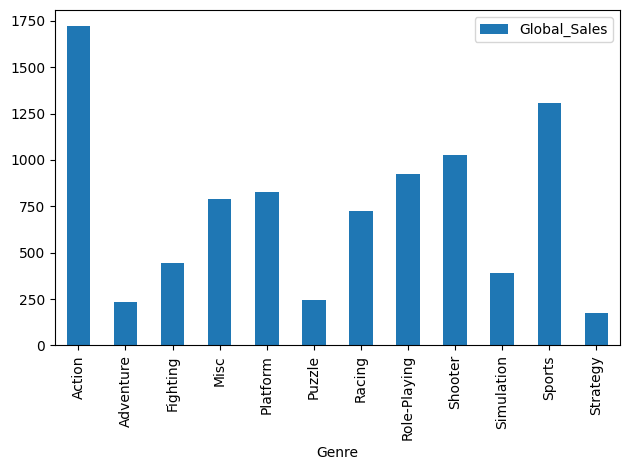

In [20]:
data.pivot_table(values='Global_Sales',index='Genre',aggfunc='sum').plot(kind='bar')
plt.tight_layout()
plt.show()

This graph tells us that 'Action' is the genre with the largest number of games sold out of all the genres, with a sales of almost 500 million over the next highest genre, 'Sports'. Along with the last graphs that show these 2 genres being the most published video game genres, this data suggests that either (1) action games popular among gamers, or (2) the genre is very broad and many games end up falling into this category and counting as 'Action' sales.

Perhaps more insights can be drawn if we were to look into how each Genre performed per region.

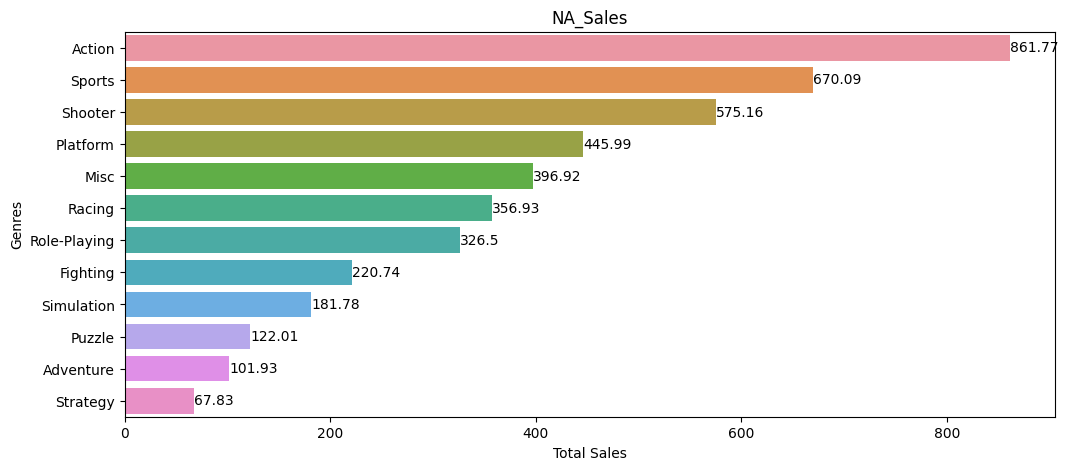

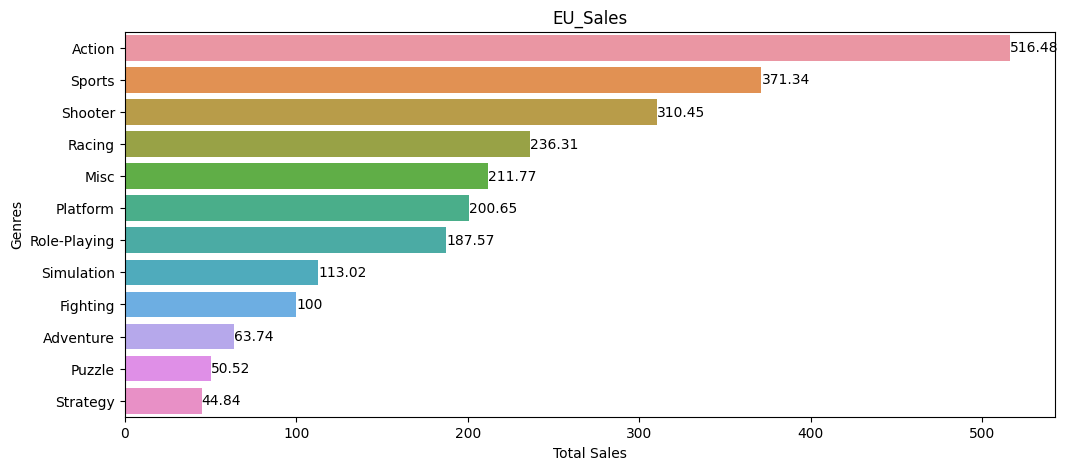

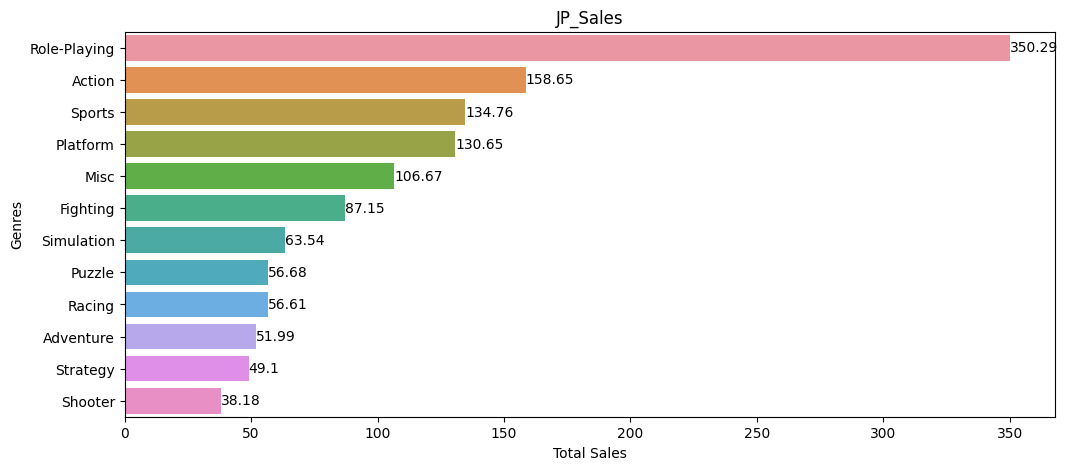

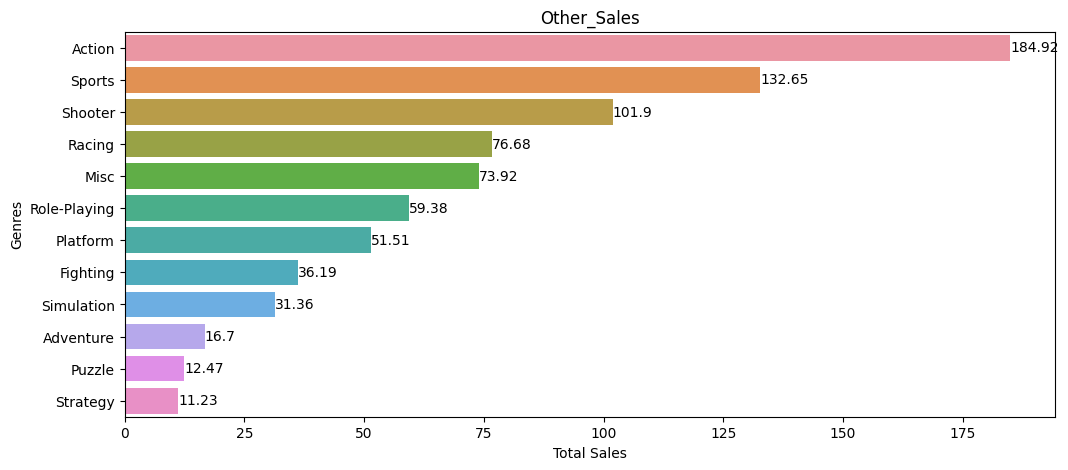

In [21]:
for i in ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']:
    region_sales = data.groupby("Genre")[i].sum().sort_values(ascending = False)
    plt.figure(figsize = (12, 5))
    ax = sns.barplot(y=region_sales.index, x=region_sales.values)
    ax.set(xlabel='Total Sales',ylabel='Genres', title=i)
    ax.bar_label(ax.containers[0])
    plt.show()

From these graphs, we can see that Action and Sports largely dominated and held the number 1 and 2 spots in terms of sales for every single region except one, which is largely in line with global sales. However, let us analyse the outlier here, being Japan.

In Japan, we can see that although Action and Sports were still largely popular, holding the number 2 and number 3 spots respectively, the first place actually went to Role Playing Game(RPG), which falls as far as 6th or 7th place in the other regions. But why is this the case? This could be because many Japanese game developers have come up and published some of the "All-time Greats" when it comes to RPGs. Some examples of these would be Super Mario and Pokemon, which are household names even among non-gamers. Other popular RPGs made by Japanese companies include Final Fantasy, Monster Hunter and Sekiro. As a whole, Japan is home to many renowned video game companies like Bandai, Nintendo, SNK, FromSoftware, Capcom, etc.

### 3.4) Sales per Platform
Another variable that may affect sales of the game is the platform that the game is released on. In this case, the popularity and availability of the console platform itself may also affect the sale of the video games released for the platform, so we will plot it out in a bar graph to compare them the amount of games published by platform.

<Axes: title={'center': 'Games published by platform'}, xlabel='Platform', ylabel='count'>

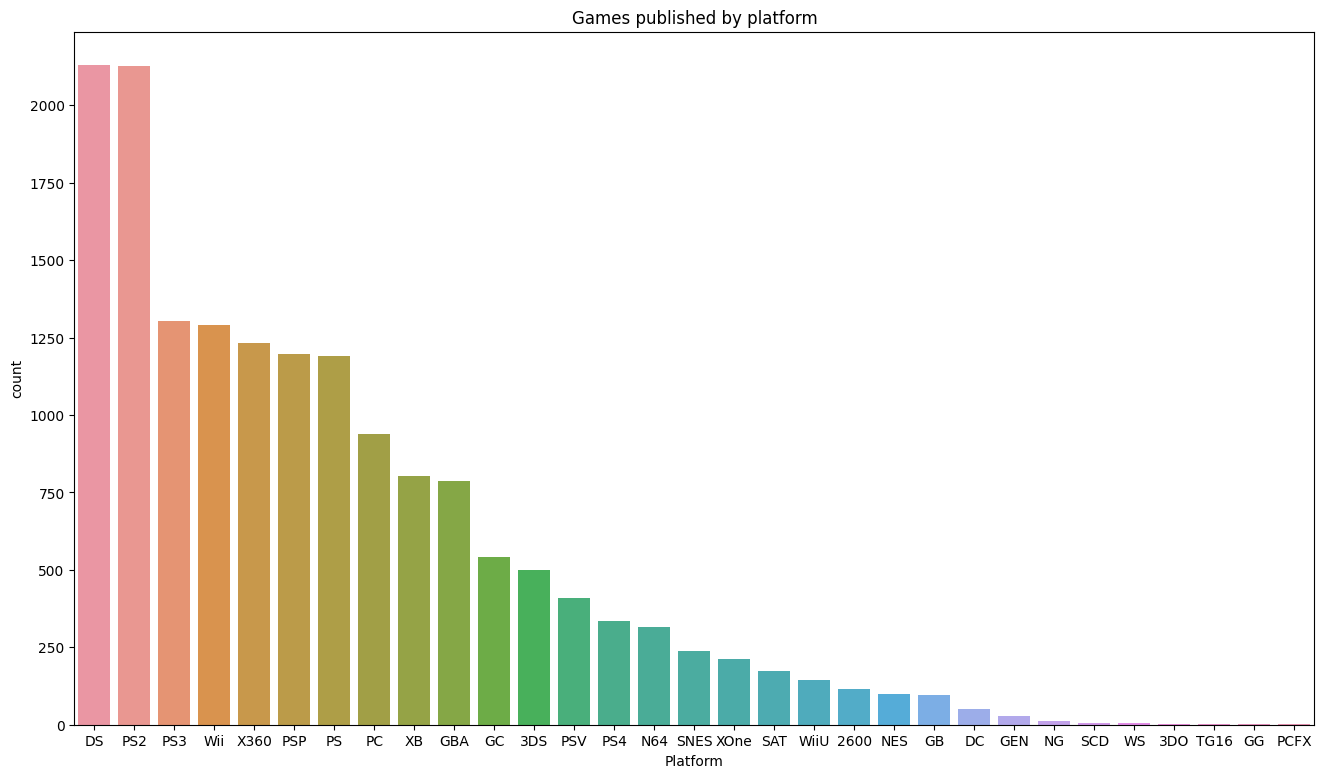

In [22]:
plt.figure(figsize=(16,9))
plt.title('Games published by platform')
sns.countplot(data=data, x = 'Platform', order = data['Platform'].value_counts().index)

This graph shows us that, at least among developers, DS and PS2 games were the most popular throughout the 50 years that the dataset spans.

Now we can delve into how well each platform actually sold.

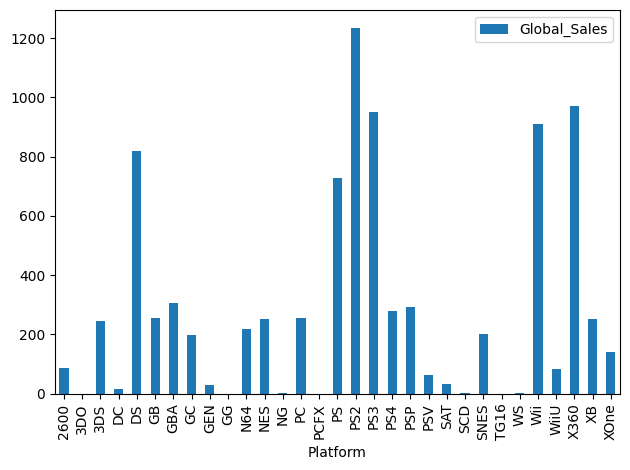

In [23]:
data.pivot_table(values='Global_Sales',index='Platform',aggfunc='sum').plot(kind='bar')
plt.tight_layout()
plt.show()

Here, we can see that games produced for the PS2, PS3, XBOX 360, Wii and DS had the highest amount of sales by a large margin compared to all other console platforms. This suggests that games produced for these 5 systems perhaps (1) were very large in quantity and many games were made for these platforms, (2) these 5 platforms were particulary popular with gamers, or (3) the particular games released during the lifespans of these platforms were particularly well received compared to other platforms.

In the previous graph, we also see that the PS2 and DS had the most games published for their platforms. Despite the PS3, XBOX 360 and Wii having less games published, they were still able to do exceedingly well in sales. This perhaps suggests these 3 platforms were extremely popular or that games released for these platforms were big titles.

Perhaps sales are affected by more than simply the Genre of the game or the Platform that the game is released on. (We will look closer into this in Section 4: Machine Learning)

### 3.5) Sales per Publisher
What about which Publisher released the game? Last but not least, let us look at that.

In [24]:
print(f"Number of unique video game publishers in dataset: {len(data['Publisher'].unique())}")

Number of unique video game publishers in dataset: 576


As we can see, there are too many publishers to properly plot a bar graph that includes all the publishers. So we will zoom in to only the publishers with the top 30 total 'Global_Sales' volumes.

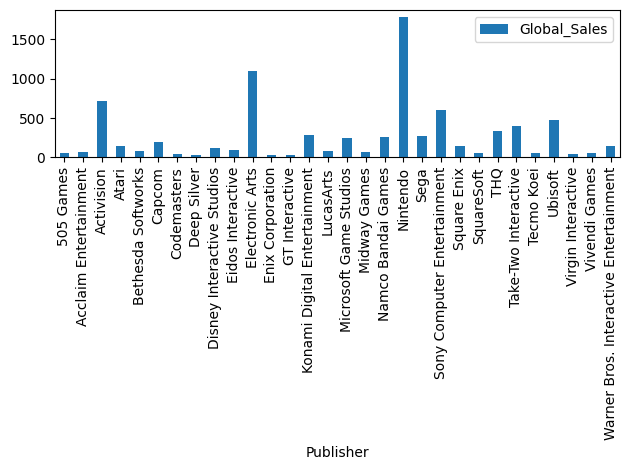

In [25]:
topPublishers=pd.DataFrame(data.groupby('Publisher')['Global_Sales'].sum().nlargest(30).sort_values(ascending=False))
topPublishers.pivot_table(values='Global_Sales',index='Publisher',aggfunc='sum').plot(kind='bar')
plt.tight_layout()
plt.show()

Here, we can clearly see the 3 publishers that generated the most global sales are Nintendo, Electronic Arts, and Activision (not including Activision Blizzard and Activision Value). Even today, these studios are still considered to be among the top video game publishers today, publishing many AAA titles.

### 3.6) Others
Well perhaps another reason why the sales of a particular Genre or Platform dominated is the presence of a standout game within that Genre or made on that Platform? Let's look at the few individual video games that ranked the highest in terms of sales.

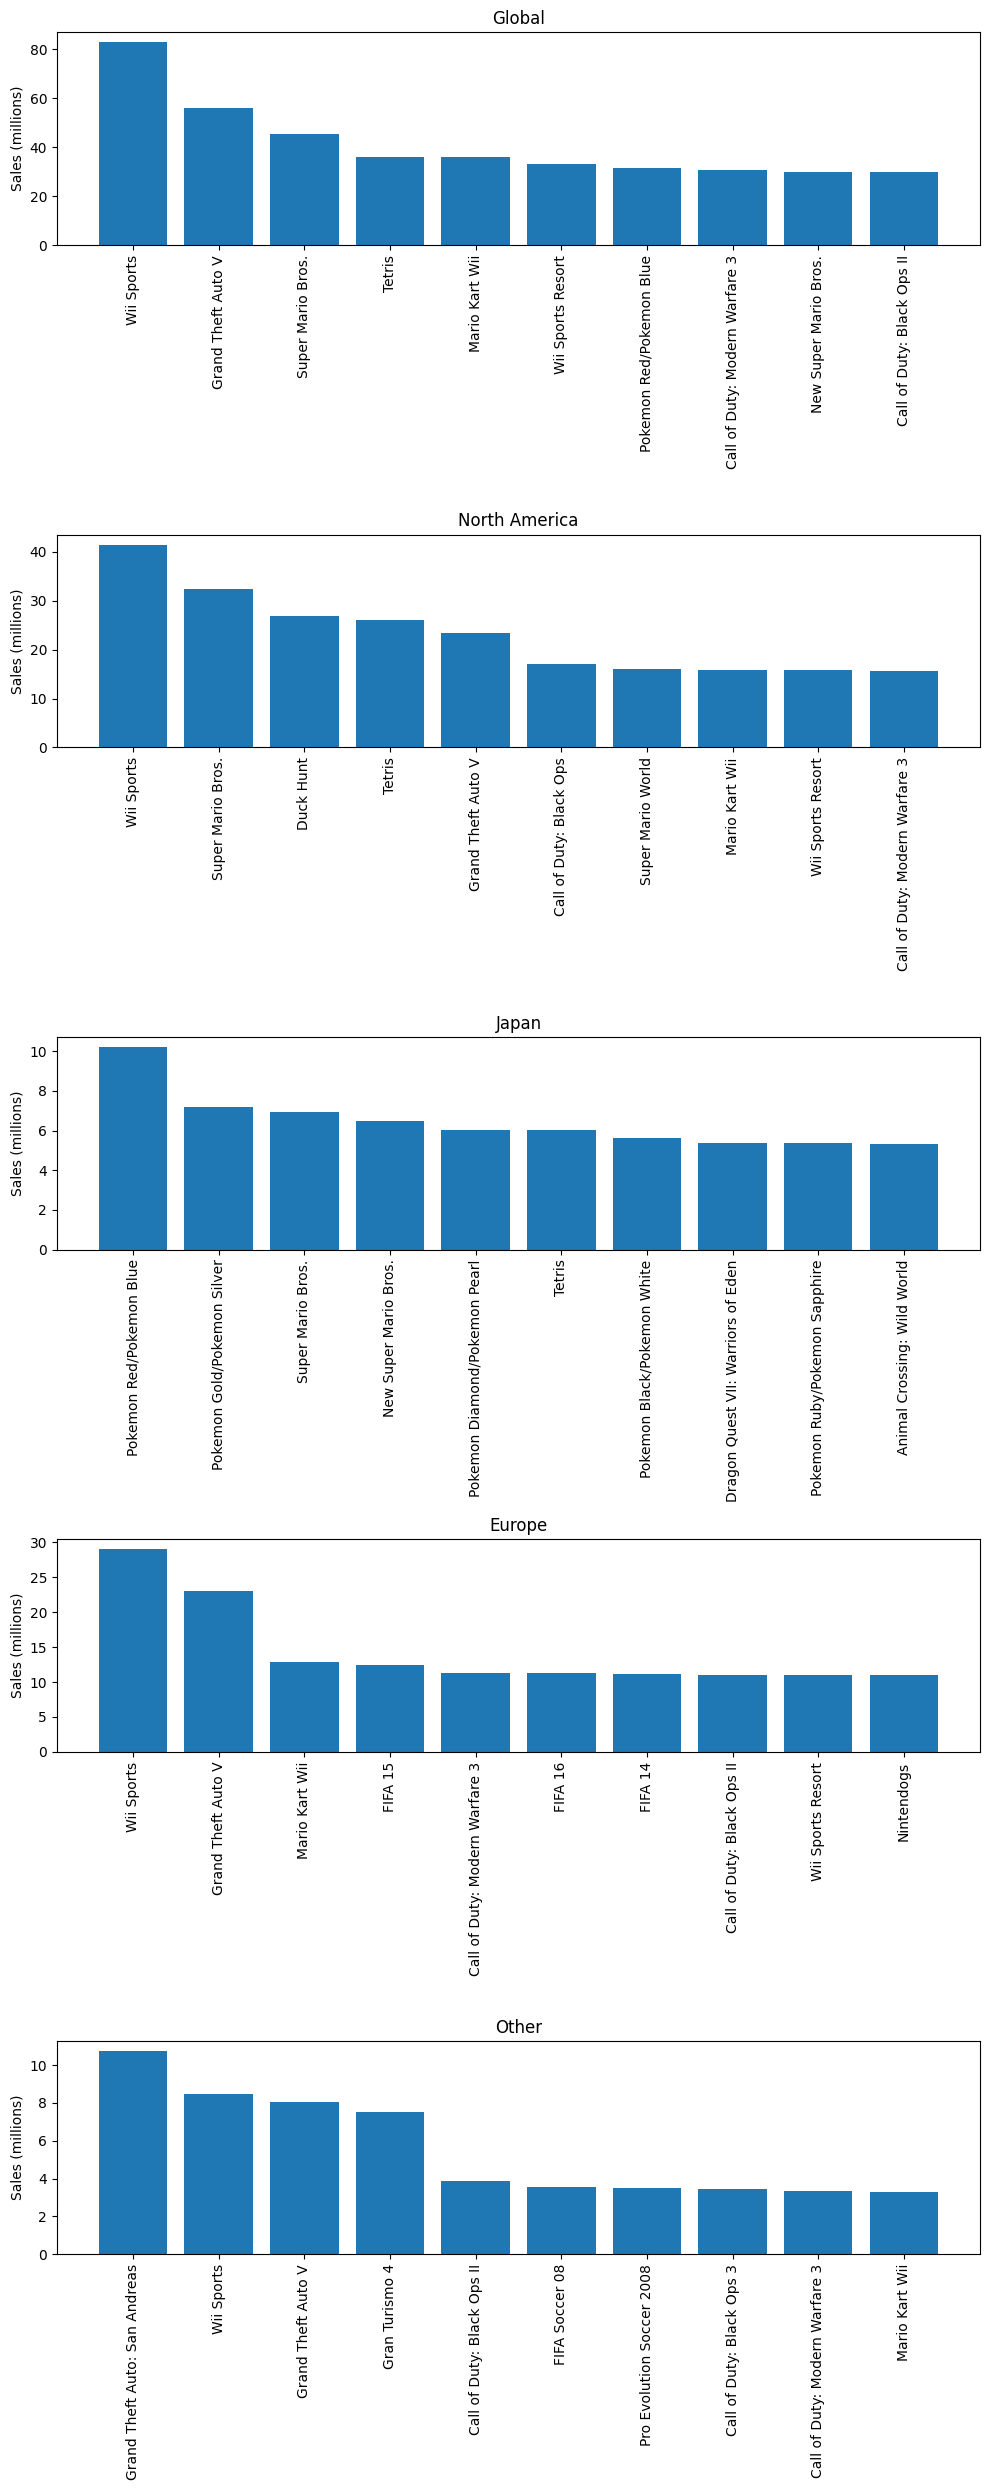

In [26]:
plt.figure(figsize=(10, 25))  # Adjusted the figure size for better fit in a single column layout

# Global
plt.subplot(5, 1, 1)  # 5 rows, 1 column, 1st subplot
global_sales = data.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.bar(global_sales.index, global_sales)
plt.title('Global')
plt.ylabel("Sales (millions)")
plt.xticks(rotation=90)

# North America
plt.subplot(5, 1, 2)  # 5 rows, 1 column, 2nd subplot
na_sales = data.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False).head(10)
plt.bar(na_sales.index, na_sales)
plt.title('North America')
plt.ylabel("Sales (millions)")
plt.xticks(rotation=90)

# Japan
plt.subplot(5, 1, 3)  # 5 rows, 1 column, 3rd subplot
jp_sales = data.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False).head(10)
plt.bar(jp_sales.index, jp_sales)
plt.title('Japan')
plt.ylabel("Sales (millions)")
plt.xticks(rotation=90)

# Europe
plt.subplot(5, 1, 4)  # 5 rows, 1 column, 4th subplot
eu_sales = data.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False).head(10)
plt.bar(eu_sales.index, eu_sales)
plt.title('Europe')
plt.ylabel("Sales (millions)")
plt.xticks(rotation=90)

# Other Regions
plt.subplot(5, 1, 5)  # 5 rows, 1 column, 5th subplot
other_sales = data.groupby('Name')['Other_Sales'].sum().sort_values(ascending=False).head(10)
plt.bar(other_sales.index, other_sales)
plt.title('Other')
plt.ylabel("Sales (millions)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Here we can see that Wii Sports had the most sales in NA and EU, and was 2nd place in other regions. Sales in NA and EU alone accumulated to account for almost 70 million of the roughly 80 million copies sold globally. However, former Wii owners will tell you that the game was bundled with the Wii console and sold at a cheaper price, potentially accounting for this huge amount of sales.

In Japan specifically, we can see that games in the Pokemon franchise held 5 out of the top 10 spots in games sold. Furthermore, the addition of Super Mario Bros., New Super Mario Bros. and Animal Crossing: Wild World, all also published by Nintendo, means that within Japan, 8 of the 10 most sold games were published by Nintendo. This could suggest that Japanese gamers had high loyalty or perception of Nintendo, which allowed Nintendo games to perform so well locally.

## 4) Machine Learning

Finally, we use the machine learning techniques we have learnt both within and outside the course to solve our problem.

### 4.1) Uni-Variate Linear Regression

In particular, we will first perform Uni-Variate Linear Regression to use the amount of sales in North America, 'NA_Sales' (X), to predict the total global sales, 'Global_Sales' (y), for a game. For this problem, we will create a 80:20 train-test split and check that there are the same number of entries in the respective train and test sets.

In [27]:
X = pd.DataFrame(data['NA_Sales'])
y = pd.DataFrame(data['Global_Sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (13032, 1) (13032, 1)
Test Set  : (3259, 1) (3259, 1)


Before we proceed to Linear Regression, we first perform a bit more exploration and visualisation on the Train Set to see how the Predictor and Response are related.

First, we look at the rough statistics of each data set.

In [28]:
X_train.describe()

,NA_Sales
count,13032.000000
mean,0.264906
std,0.823484
min,0.000000
25%,0.000000
50%,0.080000
75%,0.240000
max,41.490000


In [29]:
y_train.describe()

,Global_Sales
count,13032.000000
mean,0.541684
std,1.599025
min,0.010000
25%,0.060000
50%,0.170000
75%,0.480000
max,82.740000


Then, we concatenate the two dataframes so as to look at the correlation between the two variables using a heatmap.

<Axes: >

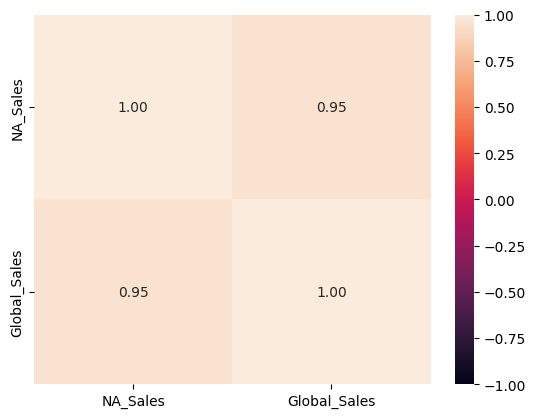

In [30]:
trainDF =  pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)
sns.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Finally, we use `sklearn`'s `LinearRegression` model to perform Linear Regression on our data. We train our Linear Regression using the Train Set obtained earlier. We use `X_train` as our predictor and `y_train` as our response.

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Now that our model is trained to fit the Linear Regression model, we can check the intercept (a) and coefficient (b) of our regression line.

In [32]:
print('Intercept \t: b = ', lr.intercept_)
print('Coefficients \t: a = ', lr.coef_)

Intercept 	: b =  [0.05499796]
Coefficients 	: a =  [[1.83720662]]


Now that we have everything we need, we can plot our regression line by predicting the Train Set using our model.

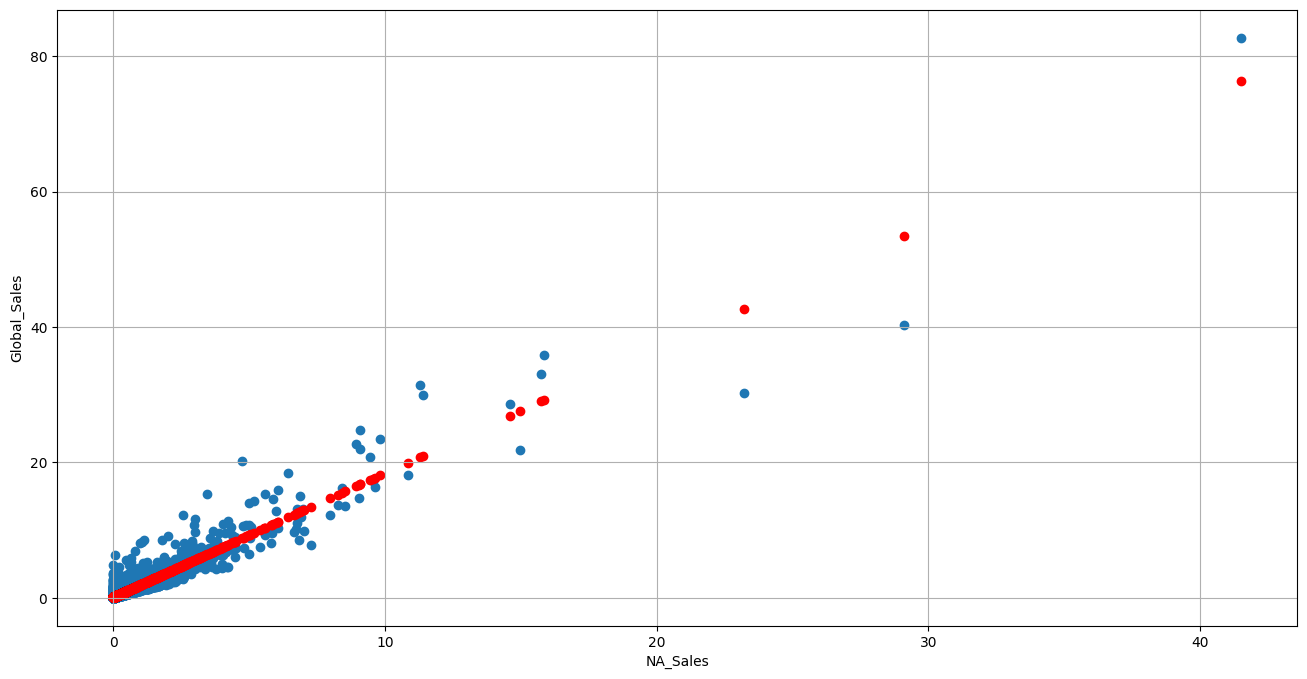

In [33]:
y_train_pred = lr.predict(X_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.grid(True)
plt.show()

Now we can check the Goodness of the Fit of the Model on the Train Set.

In [34]:
print("Goodness of Fit on Train Set:")
print("R^2 score\t\t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error\t:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error\t:", mean_absolute_error(y_train, y_train_pred))

Goodness of Fit on Train Set:
R^2 score		: 0.8951904208681856
Mean Squared Error	: 0.2679651464540287
Mean Absolute Error	: 0.20178173874442204


Since our model's R^2 score is high, it indicates that our model explains more variance in the response variable. The relatively low MSE and MAE in our model suggests that our model's predictions are extremely close to the actual values. 
Overall, our model's high R^2 score and low MAE and MSE scores indicates that our model performs well. 

Now we can finally proceed to test the Linear Regression model using our Test Set data.

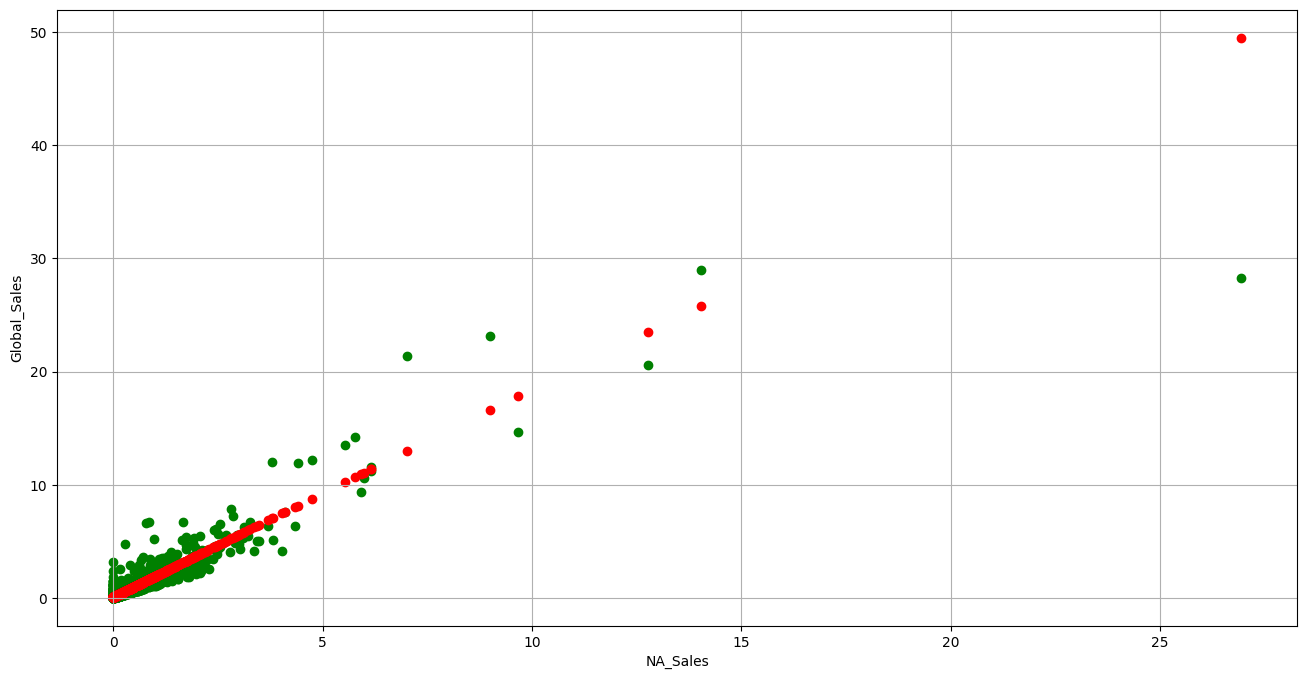

In [35]:
y_test_pred = lr.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color="g")
plt.scatter(X_test, y_test_pred, color = "r")
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.grid(True)
plt.show()

We can now check the Goodness of the Fit of the Model on the Test Set.

In [36]:
print("Goodness of Fit on Test Set:")
print("R^2 score\t\t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error\t:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error\t:", mean_absolute_error(y_test, y_test_pred))

Goodness of Fit on Test Set:
R^2 score		: 0.8371062963220217
Mean Squared Error	: 0.3348212574829934
Mean Absolute Error	: 0.19400933193723097


Similar to the train data, our model's R^2 score is high and MSE & MAE are relatively low, indicating that our model explains more variance in the response variable and that our model's predictions are extremely close to the actual values. 

Overall, our model's high R^2 score and low MAE and MSE scores indicates that our model performs well, even on the Test Set data. 

### 4.2) Multi-Variate Linear Regression

Now, we will perform Multi-Variate Linear Regression on our data. For the purpose of this Linear Regression, we will use 'NA_Sales', along with 'Genre' and 'Platform' to predict the total global sales for the game. 

In [37]:
X = pd.DataFrame(data[['NA_Sales', 'Genre', 'Platform']])
y = pd.DataFrame(data['Global_Sales'])
X

,NA_Sales,Genre,Platform
0,41.49,Sports,Wii
1,29.08,Platform,NES
2,15.85,Racing,Wii
3,15.75,Sports,Wii
4,11.27,Role-Playing,GB
...,...,...,...
16593,0.01,Platform,GBA
16594,0.01,Shooter,GC
16595,0.00,Racing,PS2
16596,0.00,Puzzle,DS


Since both 'Genre' and 'Platform' are categorical data, we will use Label Encoding to convert those categorical variables into numerical variables that can be used in a linear regression model. With label encoding, we assign a numerical value to each possible value of the categorical variable.

In [38]:
label_encoder = LabelEncoder()
X['Genre'] = label_encoder.fit_transform(X['Genre'])
X['Platform'] = label_encoder.fit_transform(X['Platform'])
X

,NA_Sales,Genre,Platform
0,41.49,10,26
1,29.08,4,11
2,15.85,6,26
3,15.75,10,26
4,11.27,7,5
...,...,...,...
16593,0.01,4,6
16594,0.01,8,7
16595,0.00,6,16
16596,0.00,5,4


Once again, we will create a 80:20 train-test split and check that there are the same number of entries in the respective train and test sets.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (13032, 3) (13032, 1)
Test Set  : (3259, 3) (3259, 1)


Now, we can once again use `sklearn`'s `LinearRegression` model to perform Linear Regression on our data. Much like in our Uni-Variate Linear Regression, we use `X_train` as our predictor and `y_train` as our response, and then check the intercept and coefficients for this model.

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercept \t: b = ', lr.intercept_)
print('Coefficients \t: a = ', lr.coef_)

Intercept 	: b =  [0.07852205]
Coefficients 	: a =  [[ 1.83798553  0.0027056  -0.00234948]]


Now we can proceed to test our Linear Regression model on our Train Set data.

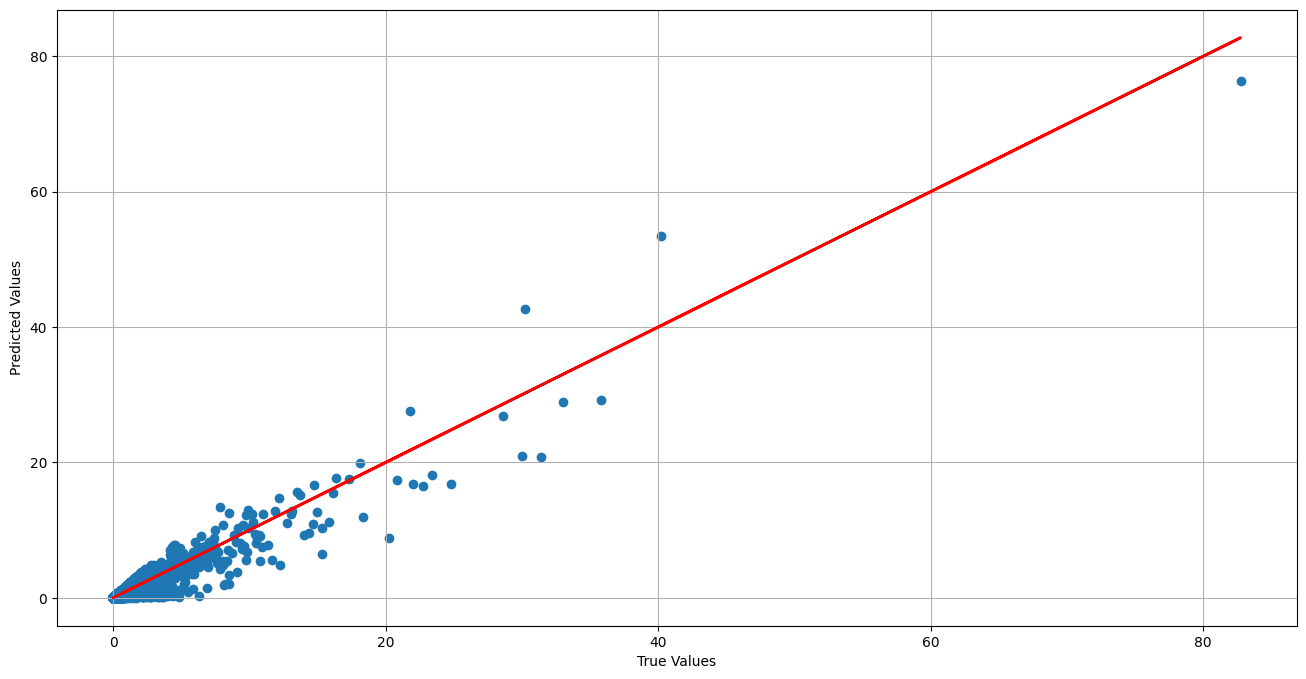

In [41]:
y_train_pred = lr.predict(X_train)

f = plt.figure(figsize=(16,8))
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, 'r-', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Now we can check the Goodness of the Fit of the Model on the Train Set.

In [42]:
print("Goodness of Fit on Train Set:")
print("R^2 score\t\t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error\t:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error\t:", mean_absolute_error(y_train, y_train_pred))

Goodness of Fit on Train Set:
R^2 score		: 0.8953784343102612
Mean Squared Error	: 0.26748445518555436
Mean Absolute Error	: 0.2020273957408097


Once again, our model's R^2 score is high, while its MSE and MAE values are low, indicating that our model performs well.

We now test the Linear Regression model using our Test Set data.

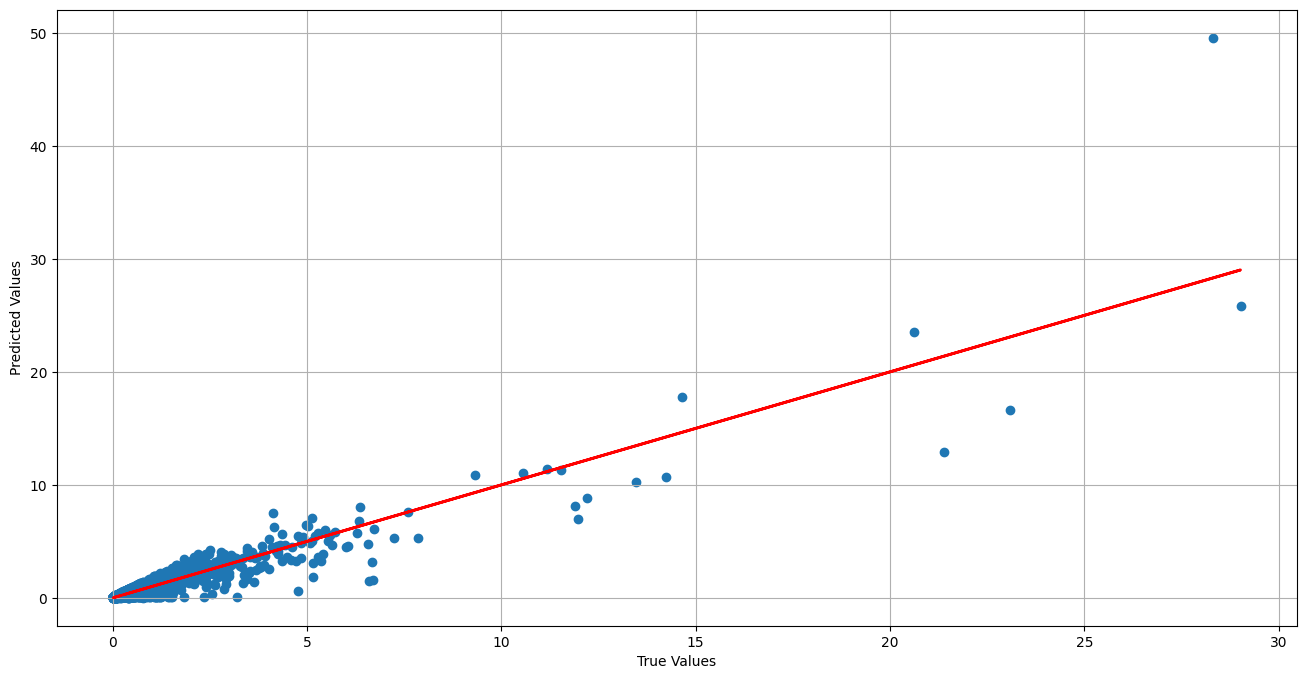

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

f = plt.figure(figsize=(16,8))
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, 'r-', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Now we can check the Goodness of the Fit of the Model on the Test Set.

In [44]:
print("Goodness of Fit on Test Set:")
print("R^2 score\t\t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error\t:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error\t:", mean_absolute_error(y_test, y_test_pred))

Goodness of Fit on Test Set:
R^2 score		: 0.8371478224418119
Mean Squared Error	: 0.33473590226463595
Mean Absolute Error	: 0.1938837218359854


Similar to the train data, our model's R^2 score is high and MSE & MAE are realtively low, indicating that our model explains more variance in the response variable and that our model's predictions are extremely close to the actual values. 

Overall, our model's high R^2 score and low MAE and MSE scores indicates that our model performs well, even on the Test Set data. 

By using more variables in our model, we expect the accuracy of our model's predictions to increase. However, we find that the R^2 score did not increase significantly between Uni-Variate and Multi-Variate Linear Regressions.

What has gone wrong?

### 4.3) Reflection and Modification

Let's look back at X again to see what the data in X represents.

In [45]:
X

,NA_Sales,Genre,Platform
0,41.49,10,26
1,29.08,4,11
2,15.85,6,26
3,15.75,10,26
4,11.27,7,5
...,...,...,...
16593,0.01,4,6
16594,0.01,8,7
16595,0.00,6,16
16596,0.00,5,4


After being label encoded, the categorical data became numerical. Let's look into it. <br>
Genre 'Sports' has a value 10.
Genre 'Racing' has a value 6.
Platform 'Wii' has a value of 26.
Platform 'NES' has a value of 11.
etc.

This will confuse the model because it may think that 'Sports' is somehow greater than 'Racing', while 'Wii' is somehow greater than 'NES', and so on...

In other words, using label encoding presents a ***false numerical relationship***, which should be avoided.

Is there a better encoding method?

One possible alternative is one-hot encoding. Let's try implementing it.

In [46]:
X = pd.DataFrame(data[['NA_Sales', 'Genre', 'Platform']])
y = pd.DataFrame(data['Global_Sales'])
X

,NA_Sales,Genre,Platform
0,41.49,Sports,Wii
1,29.08,Platform,NES
2,15.85,Racing,Wii
3,15.75,Sports,Wii
4,11.27,Role-Playing,GB
...,...,...,...
16593,0.01,Platform,GBA
16594,0.01,Shooter,GC
16595,0.00,Racing,PS2
16596,0.00,Puzzle,DS


In [47]:
X = pd.get_dummies(data=X, columns=['Platform','Genre'], drop_first=True)
X

,NA_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,41.49,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,29.08,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,15.85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,15.75,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11.27,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.01,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
16594,0.01,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
16595,0.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
16596,0.00,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


As we can see, one-hot encoding creates new columns for each 'Genre' and 'Platform' and gives it a binary value, with **1** indicating the game is on the platform or in the genre, while **0** indicates it is not. Now, we can re-train our Multi-Variate Linear Regression model with our new DataFrame.

Again, we split into 80% train and 20% test sets respectively.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (13032, 42) (13032, 1)
Test Set  : (3259, 42) (3259, 1)


In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercept \t: b = ', lr.intercept_)
print('Coefficients \t: a = ', lr.coef_)

Intercept 	: b =  [-0.56601549]
Coefficients 	: a =  [[ 1.84392476e+00  6.10573445e-01  7.40263472e-01  7.22873655e-01
   6.09004975e-01  9.41810306e-01  5.32285659e-01  4.76738796e-01
   2.80382038e-01  6.34867296e-01  4.37912939e-01  9.52576500e-01
   6.96844972e-01  6.51975265e-01  4.44089210e-16  6.61463326e-01
   6.43943726e-01  7.25393952e-01  7.92471417e-01  6.29309631e-01
   6.16825976e-01  7.50216560e-01  4.88978927e-01  9.38546546e-01
   6.17144365e-01  7.13609227e-01  5.64089821e-01  6.67249529e-01
   4.60529501e-01  4.64252503e-01  5.15482990e-01 -1.95696968e-02
  -5.84835007e-03 -2.72065091e-03 -2.88518043e-02 -2.60340206e-02
   2.92903523e-02  1.46503598e-01 -3.11288737e-02  1.19298561e-02
  -6.78526464e-04 -3.73973557e-03]]


Now we can plot our lines and see how our Linear Regression model performs on both the Train and Test Sets.

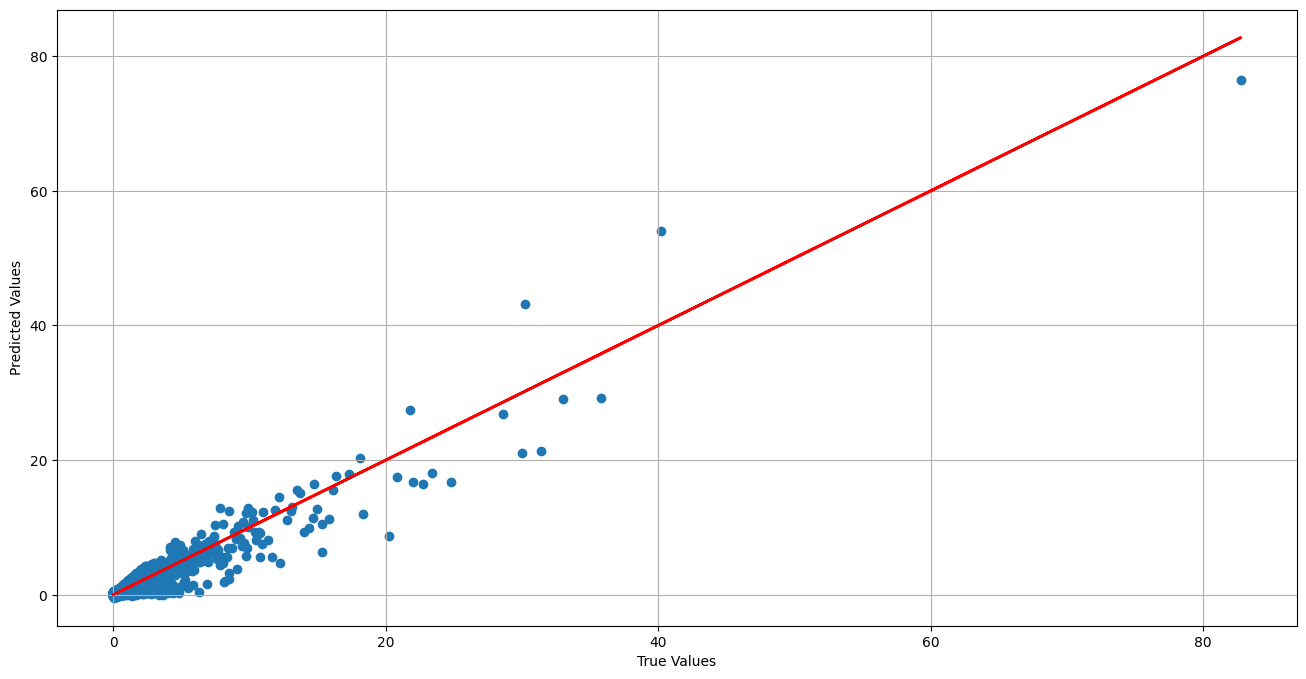

In [50]:
y_train_pred = lr.predict(X_train)

f = plt.figure(figsize=(16,8))
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, 'r-', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

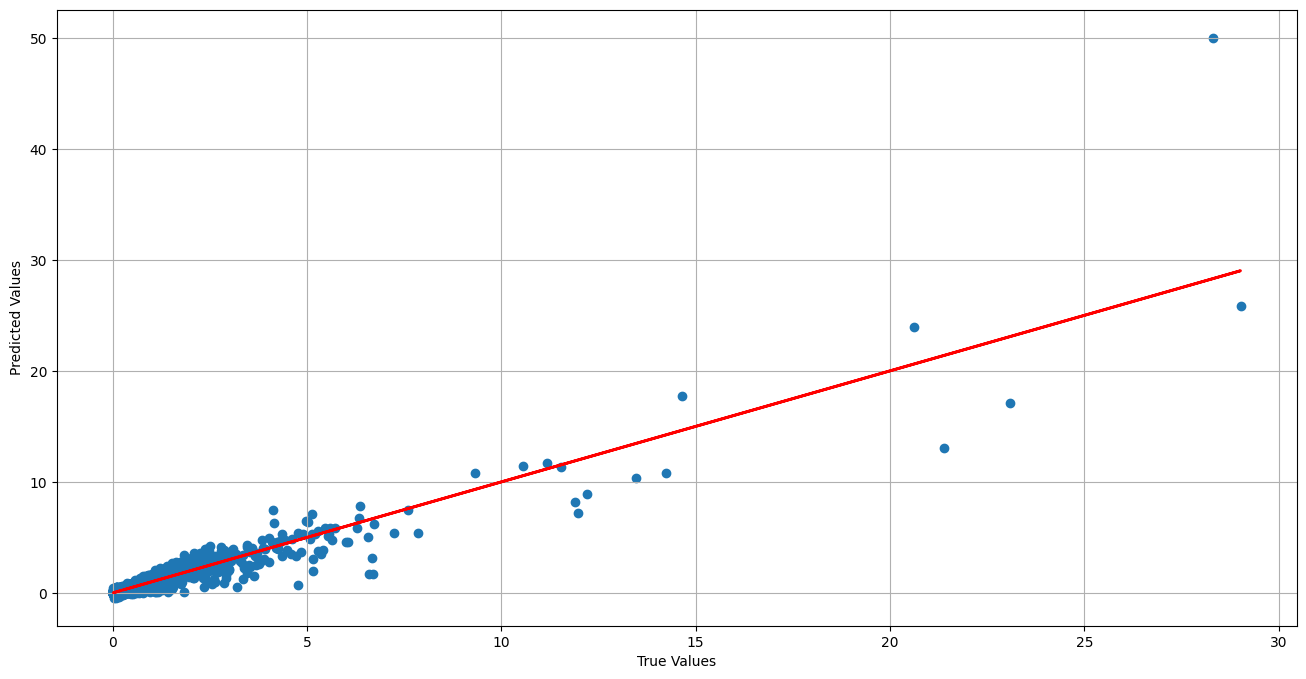

In [51]:
y_test_pred = lr.predict(X_test)

f = plt.figure(figsize=(16,8))
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, 'r-', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Now we can check the Goodness of the Fit of the Model on the Train and Test Set.

In [52]:
print("Goodness of Fit on Train Set:")
print("R^2 score\t\t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error\t:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error\t:", mean_absolute_error(y_train, y_train_pred))
print("\n\n")
print("Goodness of Fit on Test Set:")
print("R^2 score\t\t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error\t:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error\t:", mean_absolute_error(y_test, y_test_pred))

Goodness of Fit on Train Set:
R^2 score		: 0.9015339475927185
Mean Squared Error	: 0.25174674273697234
Mean Absolute Error	: 0.19716586966852673



Goodness of Fit on Test Set:
R^2 score		: 0.8423727711583765
Mean Squared Error	: 0.32399623670320493
Mean Absolute Error	: 0.19224731021548905


It seems that switching the encoding method did not increase results much either. Since we already established that NA_Sales and  Global_Sales were strongly connected, the only possibility is that there is a very weak relationship between Genre and Platform against global sales.

Let's look into it.

We start exploring the relationship between Genre and Platform against global sales.

In [53]:
X = pd.DataFrame(data[['Genre', 'Platform']])
X = pd.get_dummies(data=X, columns=['Platform','Genre'], drop_first=True)
y = pd.DataFrame(data['Global_Sales'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train


,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
16506,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
10962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4022,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
15245,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
16452,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3313,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercept \t: b = ', lr.intercept_)
print('Coefficients \t: a = ', lr.coef_)

Intercept 	: b =  [0.7194873]
Coefficients 	: a =  [[-5.60991782e-01 -2.53961515e-01 -4.63765270e-01 -3.13187465e-01
   1.70283154e+00 -4.12051964e-01 -4.16971041e-01  2.05579562e-01
  -1.01520008e+00 -1.26792438e-01  1.59806998e+00 -6.39663570e-01
  -4.42761912e-01  3.33066907e-15 -1.22036841e-01 -1.57048804e-01
  -5.85373426e-02 -5.30215253e-02 -4.59826758e-01 -5.58254359e-01
  -5.35729472e-01 -4.33342227e-01 -4.63549340e-02 -9.51737720e-01
  -5.03610090e-01  1.80630701e-02 -1.82826925e-01  3.31360566e-02
  -4.94178050e-01 -1.42247042e-01 -2.67690934e-01  4.77550818e-02
  -6.12657778e-02  3.35712782e-01 -8.60184723e-02  1.16562940e-01
   1.44409754e-01  2.52250418e-01 -2.17771544e-02  2.95457597e-02
  -1.71307663e-01]]


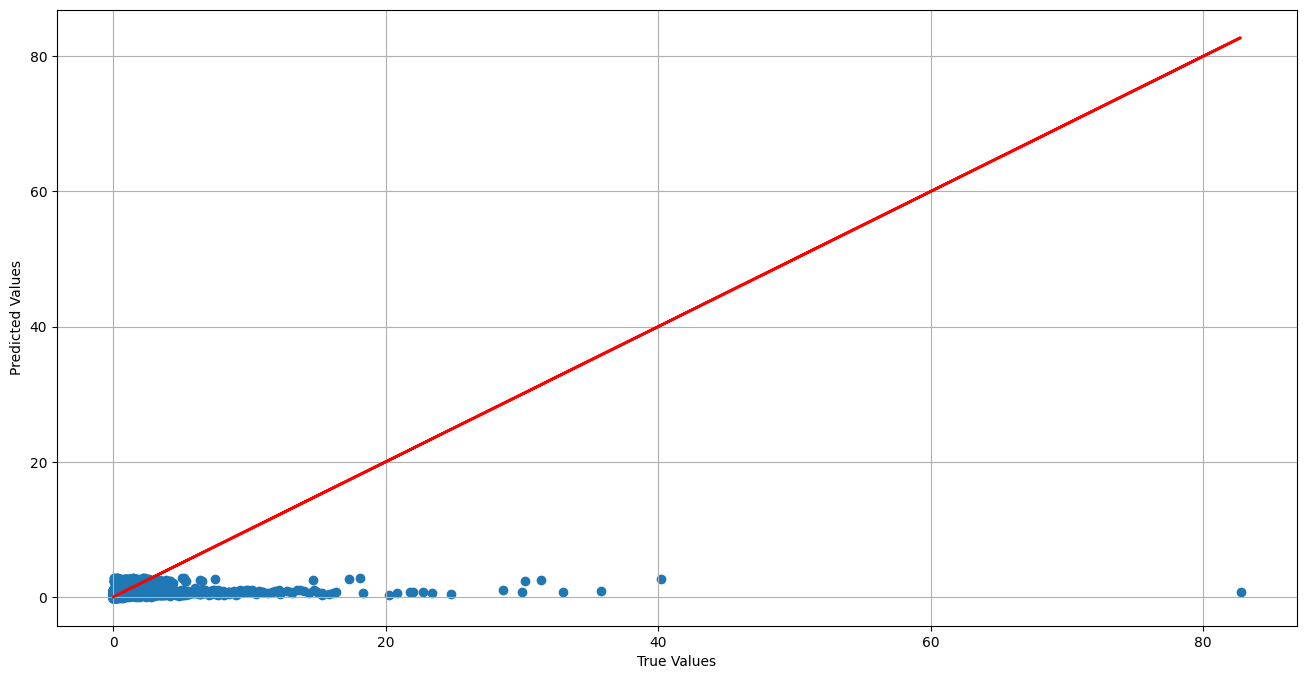

In [55]:
y_train_pred = lr.predict(X_train)

f = plt.figure(figsize=(16,8))
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, 'r-', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

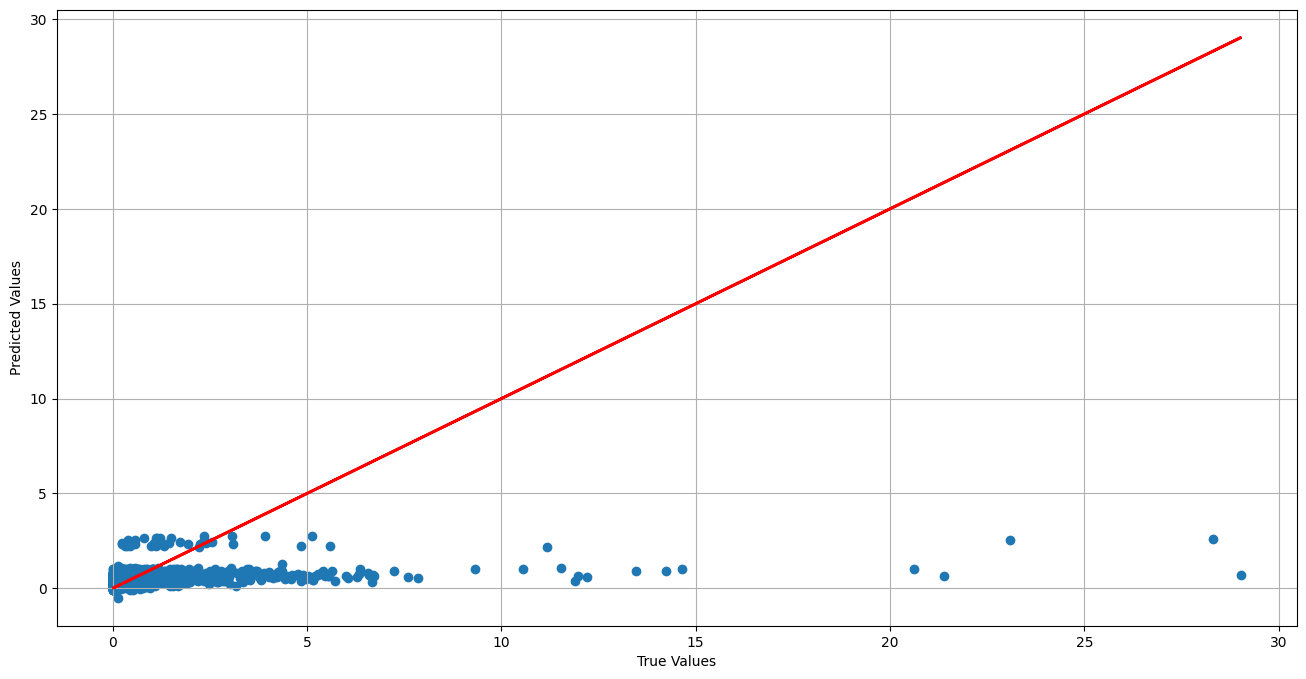

In [56]:
y_test_pred = lr.predict(X_test)

f = plt.figure(figsize=(16,8))
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, 'r-', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [57]:
print("Goodness of Fit on Train Set:")
print("R^2 score\t\t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error\t:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error\t:", mean_absolute_error(y_train, y_train_pred))
print("\n\n")
print("Goodness of Fit on Test Set:")
print("R^2 score\t\t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error\t:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error\t:", mean_absolute_error(y_test, y_test_pred))

Goodness of Fit on Train Set:
R^2 score		: 0.03989516078189126
Mean Squared Error	: 2.4546862603917057
Mean Absolute Error	: 0.5622799812100164



Goodness of Fit on Test Set:
R^2 score		: 0.0661869029307719
Mean Squared Error	: 1.919414123168939
Mean Absolute Error	: 0.5664269067429719


The result is as we suspected. R^2 value is very close to 0, indicating that there is a very weak relationship.

### 5) Conclusion
In conclusion, this data science project aimed to predict video game sales based on various features such as genre, platform, and sales by individual region. Through the implementation of linear regression, we were able to develop a predictive model with promising performance in our Uni-Variate Linear Regression model.

Other than content covered during the course, our project included new techniques used in preparing the data for Linear Regression, in the form of Label Encoding and One-hot Encoding. Through encoding, we were able to use categorical data such as Genre and Platform as predictors in our data, in hopes of helping to make our final Linear Regression model more accurate.

Our final findings showed that both a Uni-Variate Linear Regression model comparing sales in NA to global sales, as well as a Multi-Variate Linear Regression model that added Genre and Platform into these predictors had extremely high accuracy, with an R^2 score of over 83%, indicating that it explains more than 83% of the variance in video game sales. Additionally, the model exhibited a low mean squared error and mean absolute error, suggesting that, on average, the model's predictions were close to the actual sales figures. 

However, when we tried to remove sales in NA as a predictor, in order to creat a Multi-Variate Linear Regression model to see if there was a strong relationship between genre and platform of the game, when compared to the global sales of the game. The extremely low R^2 value of this model indicates that there is a very weak, or perhaps the lack of a relationship between these factors.

Overall, these results could possibly indicate that a Multi-Variate Linear Regression model is not always necessarily better than a Uni-Variate Linear Regression model. This is because the additional independent variables we use as predictors may have a very weak relationship with the variable being predicter. In the example of our Linear Regression models, we found that Genre and Platform had a weak relationship with Global Sales, and as such did not necessarily help make our original Uni-Variate Linear Regression model better.

Future work could involve further refining the model by incorporating additional predictors from other datasets or exploring different machine learning algorithms to improve predictive performance.